<a href="https://colab.research.google.com/github/youssefkhemiri/Loan-status-prediction/blob/main/loan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

### This is a loan prediction project.Using a set of variables, I will predict which of the banks customers are more likely to have their loan application approved. This is a classification problem in Machine Learning, and banks can use these models to assess their customers for loan qualification and fitness. 

# Import Relevant Modules

In [ ]:
# Data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Data Preview

In [ ]:
#load training and testing data

file_train ='./train_loan.csv' 
file_test = './test_loan.csv'
loan_train = pd.read_csv(file_train, sep=',')
loan_test = pd.read_csv(file_test, sep=',')

In [ ]:
# preview data
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Copy the data, I will use the copy to create some visualization of categorical data using a loop
# This is a fix, because I dealt with the missing data earlier

loan_train_cc = loan_train.copy()

In [ ]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
len(loan_train)

614

In [ ]:
len(loan_test)

367

In [ ]:
# We have missing data
loan_train.isna().values.any()

True

In [ ]:
# we have missing data
loan_test.isna().values.any()

True

In [ ]:
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Cleaning & Preparation

In [ ]:
# We'll do a forward fill here, so, we get only 1 or 0 to fill the missing data

loan_train['Credit_History'].fillna(method='ffill', inplace=True)
loan_train['Credit_History'].isna().values.any()

False

In [ ]:
# We'll fill this column using the median of the values

median_loan = loan_train['Loan_Amount_Term'].median()
loan_train['Loan_Amount_Term'].fillna((median_loan), inplace=True)
loan_train['Loan_Amount_Term'].isna().values.any()

False

In [ ]:
# We'll fill this column using the median of the values

median_loan_amount = loan_train['LoanAmount'].median()
loan_train['LoanAmount'].fillna((median_loan_amount), inplace=True)
loan_train['LoanAmount'].isna().values.any()

False

In [ ]:
# Count the values to know which occurs most frequently
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#Fill with mode
loan_train['Self_Employed'].fillna('No', inplace=True)
loan_train['Self_Employed'].isna().values.any()

False

In [ ]:
# fill with mode
loan_train['Dependents'].fillna(0, inplace=True)
loan_train['Dependents'].isna().values.any()

False

In [ ]:
loan_train['Married'].mode()

0    Yes
dtype: object

In [ ]:
# fill with mode
loan_train['Married'].fillna('Yes', inplace=True)
loan_train['Married'].isna().values.any()

False

In [ ]:
loan_train['Gender'].mode()

0    Male
dtype: object

In [ ]:
# fill with mode
loan_train['Gender'].fillna('Male', inplace=True)
loan_train['Gender'].isna().values.any()

False

In [ ]:
# Let's run a quick check
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### After sorting the missing values for train data, I will do the same for test data 

In [ ]:
# A preview of missing data in the testing set

loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
# fill in credit history
loan_test['Credit_History'].fillna(method='ffill', inplace=True)

# fill in loan amount term
median_loan_test = loan_test['Loan_Amount_Term'].median()
loan_test['Loan_Amount_Term'].fillna((median_loan_test), inplace=True)

# fill in loan amount
median_loan_amount_test = loan_test['LoanAmount'].median()
loan_test['LoanAmount'].fillna((median_loan_amount_test), inplace=True)

# fill in self employed
loan_test['Self_Employed'].fillna('No', inplace=True)

# fill in dependents
loan_test['Dependents'].fillna(0, inplace=True)

# fill in gender
loan_test['Gender'].fillna('Male', inplace=True)


In [ ]:
loan_test.isna().values.any()

False

In [ ]:
# Let's run a final check

loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Let's deal with duplicate values

In [ ]:
loan_train.duplicated().values.any()

False

In [ ]:
loan_test.duplicated().values.any()

False

# Data Visualization & Exploratory Analysis

In [ ]:
# Let's preview the data again

loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


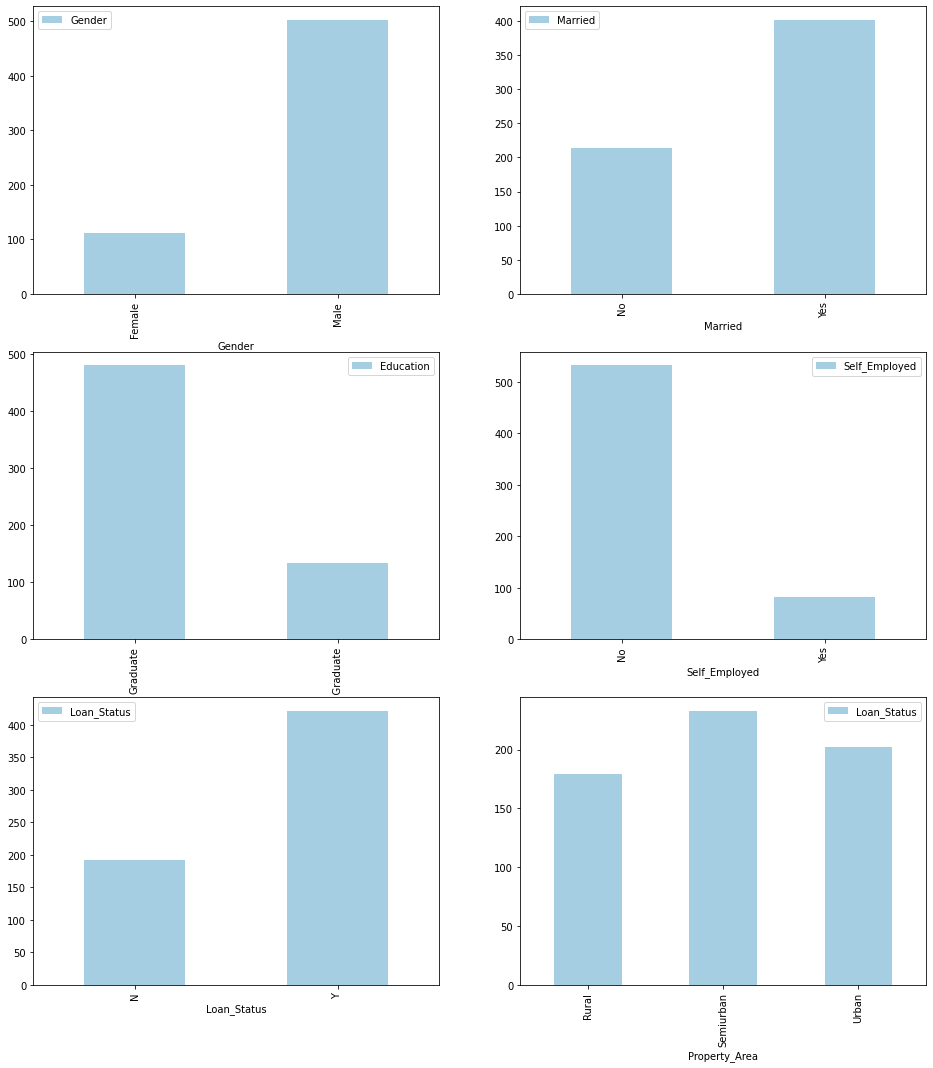

In [ ]:
# Bar charts to get a high level view of categorical data

fig, ax = plt.subplots(3, 2, figsize=(16, 18))

loan_train.groupby(['Gender'])[['Gender']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[0,0])
loan_train.groupby(['Married'])[['Married']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[0,1])
loan_train.groupby(['Education'])[['Education']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[1,0])
loan_train.groupby(['Self_Employed'])[['Self_Employed']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[1,1])

loan_train.groupby(['Loan_Status'])[['Loan_Status']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[2,0])
loan_train.groupby(['Property_Area'])[['Loan_Status']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[2,1])

plt.show()

In [ ]:
# Here, I pass all categorical columns into a list

categorical_columns = loan_train_cc.select_dtypes('object').columns.to_list()

In [ ]:
# Then, I filter he list to remove Loan_ID column which is not relevant to the analysis
categorical_columns[1:]

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
#Correlation explains how one or more variables are related to each other.
loan_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.020183
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.009391
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.018454
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.022967
Credit_History,-0.020183,0.009391,-0.018454,-0.022967,1.000000


# Data Pre-processing for Model Building


* Note that a lot of the data preparation has been done (like dealing with missing values)
* Now, the next thing to do would be to encode categorical data (change categorical data to numeric data). For this, I will use the scikit-Learn LabelEncoder.

-->Label Encoder:
Label Encoding in Python can be achieved using Sklearn Library. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [ ]:
# Let's take another preview of the data
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#first identify all categorical columns & pass into a variable
objectlist_train = loan_train.select_dtypes(include = "object").columns


# Then Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectlist_train:
    loan_train[feature] = le.fit_transform(loan_train[feature].astype(str))

print (loan_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB
None


In [ ]:
# Now, repeat the same process to encode the test data

objectlist_test = loan_test.select_dtypes(include='object').columns

for feature in objectlist_test:
    loan_test[feature] = le.fit_transform(loan_test[feature].astype(str))

print (loan_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int64  
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 34.5 KB
None


# Machine Learning Model Development

In [ ]:
x = loan_train.iloc[:,1:].drop('Loan_Status', axis=1) # drop loan_status column because that is what we are predicting
y = loan_train['Loan_Status']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=0)

#### Decision Tree Classifier Model

In [ ]:
df_model = DecisionTreeClassifier()
df_model.fit(train_x, train_y)
predict_y = df_model.predict(test_x)
df_model.score(test_x, test_y)
print("Accuracy:", accuracy_score(predict_y, test_y))
print(confusion_matrix(test_y, predict_y))

Accuracy: 0.7675675675675676
[[ 28  23]
 [ 20 114]]


#### Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_x, train_y)
predict_y_2 = rf_model.predict(test_x)
rf_model.score(test_x, test_y)
print("Accuracy:", accuracy_score(predict_y_2, test_y))
print(confusion_matrix(test_y, predict_y_2))

Accuracy: 0.8
[[ 24  27]
 [ 10 124]]


#Thank you
### Work presented by **Youssef khemiri**